**Capstone Project 1 - Predicting Automobile Accidents in Montgomery County**

Can accident frequency be predicted for automobiles based on particular factors?  In this capstone project the data from Maryland's Montgomery county traffic stop database is used to look at variables that could potentially help predict increased accident likelihood.  

-Can accidents be predicted based on the month?
-Is there a connection between certain colors of automobiles being in more accidents due to their color, or is it more a popularity of that color leading to more of them to have more accidents? 
-Can a recommendation be made on certain colors being safer automobiles?
-What caused the year 2017 to have more accidents?
-Did alcohol affect the amount of accidents with any significance?


Future questions - Can accidents be predicted based on the day of the week (weekday, weekend)?
Can conclusions be made that driving a certain color car on a certain day of the week is more likely to get in an accident vs other car colors?


**Import Packages and Read Data**

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/capstone-1/Traffic_Violations.csv
/kaggle/input/traffic-violations-2020/Traffic_Violations_2020.csv


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed

from datetime import datetime
from matplotlib.dates import WeekdayLocator
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU #prep for investigating dates

import pandas as pd
from pandas.io.json import json_normalize 
data = pd.read_csv("../input/traffic-violations-2020/Traffic_Violations_2020.csv", parse_dates = ['Date Of Stop', 'Time Of Stop'])
#This data comes from the dataset with traffic violation information issued in the county of Montgomery, located in Maryland.

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,21,22,23,24,25,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import imblearn

Using TensorFlow backend.


**Clean and Merge Data**
This set was fairly clean.  It is crucial to include this step.  There were some missing values to be aware of.  

Question:  Can missing data be identified and can we see where there may be missing values?  **Identify included data**

In [4]:
data.info()
#This was done to identify categories with missing information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632871 entries, 0 to 1632870
Data columns (total 43 columns):
SeqID                      1632871 non-null object
Date Of Stop               1632871 non-null datetime64[ns]
Time Of Stop               1632871 non-null datetime64[ns]
Agency                     1632871 non-null object
SubAgency                  1632871 non-null object
Description                1632862 non-null object
Location                   1632869 non-null object
Latitude                   1632871 non-null float64
Longitude                  1632871 non-null float64
Accident                   1632871 non-null object
Belts                      1632871 non-null object
Personal Injury            1632871 non-null object
Property Damage            1632871 non-null object
Fatal                      1632871 non-null object
Commercial License         1632871 non-null object
HAZMAT                     1632871 non-null object
Commercial Vehicle         1632871 non-null object
Al

Answer:  1,632,871 is the total number of non-null objects recorded.  Any category without this full amount is missing information.  

Question:  What vehicle types are listed in the data set?  What would be a good representation for a general population to sample?

In [5]:
data.VehicleType.value_counts()
##Step to identify all types of vehicles listed in the 'Vehicle Type'
##From here it was determined to use only the Automobiles section

02 - Automobile              1441219
05 - Light Duty Truck          86620
28 - Other                     28983
03 - Station Wagon             24160
01 - Motorcycle                14551
06 - Heavy Duty Truck          13920
29 - Unknown                   10297
08 - Recreational Vehicle       5118
25 - Utility Trailer            1672
19 - Moped                      1602
07 - Truck/Road Tractor         1512
04 - Limousine                   886
20 - Commercial Rig              848
10 - Transit Bus                 531
12 - School Bus                  313
27 - Farm Equipment              131
09 - Farm Vehicle                107
26 - Boat Trailer                101
21 - Tandem Trailer               84
11 - Cross Country Bus            59
23 - Travel/Home Trailer          31
22 - Mobile Home                  26
24 - Camper                       19
14 - Ambulance(Non-Emerg)         18
18 - Police(Non-Emerg)            17
13 - Ambulance(Emerg)             14
15 - Fire(Emerg)                  13
1

Answer:  There are over one million automobiles in this data set.  This would be primarily the focus for most consumers and the clients identified for this study.  

Question:  How many of each color automobile exists in the data set?  **Filter only Automobiles**

In [6]:
only_automobiles_color= data.loc[(data['VehicleType'] == '02 - Automobile') , ['Color', 'VehicleType']]
#Create a new dataframe of only automobiles and their colors.
only_automobiles_color.Color.value_counts()
#Count total number of automobiles in each color.

BLACK          302920
SILVER         277374
WHITE          204921
GRAY           170297
RED            112190
BLUE           107037
GREEN           50681
GOLD            45461
BLUE, DARK      30384
TAN             29503
MAROON          23658
BLUE, LIGHT     18778
BEIGE           16738
GREEN, DK       14368
GREEN, LGT       7831
BROWN            6246
ORANGE           5036
YELLOW           4234
BRONZE           3179
PURPLE           2683
CREAM             845
MULTICOLOR        510
COPPER            430
PINK              192
CHROME             40
CAMOUFLAGE         25
Name: Color, dtype: int64

In [7]:
only_automobiles_color_nonull= only_automobiles_color.dropna(axis = 0, subset = ['Color'])
#drop nulls from only autos,color that are nan.
only_automobiles_color_nonull.Color.value_counts()
#Final count on number of automobiles of each color.

BLACK          302920
SILVER         277374
WHITE          204921
GRAY           170297
RED            112190
BLUE           107037
GREEN           50681
GOLD            45461
BLUE, DARK      30384
TAN             29503
MAROON          23658
BLUE, LIGHT     18778
BEIGE           16738
GREEN, DK       14368
GREEN, LGT       7831
BROWN            6246
ORANGE           5036
YELLOW           4234
BRONZE           3179
PURPLE           2683
CREAM             845
MULTICOLOR        510
COPPER            430
PINK              192
CHROME             40
CAMOUFLAGE         25
Name: Color, dtype: int64

In [8]:
only_automobiles_color_nonull.Color.unique()
##Identify all colors of autos that exist in the data that have a value

array(['BLACK', 'WHITE', 'SILVER', 'GRAY', 'RED', 'BLUE', 'GREEN, DK',
       'BEIGE', 'GREEN', 'YELLOW', 'MAROON', 'BROWN', 'BLUE, LIGHT',
       'TAN', 'BLUE, DARK', 'GOLD', 'ORANGE', 'BRONZE', 'GREEN, LGT',
       'COPPER', 'PURPLE', 'CREAM', 'MULTICOLOR', 'PINK', 'CHROME',
       'CAMOUFLAGE'], dtype=object)

Question:  When comparing the percentage of the represented colors for all vehicles to represented colors for only automobiles, are they similar enough to give an accurate assessment for what this study is looking at to use only the automobiles as the sample dataset?

In [9]:
(data['Color'].value_counts()/data['Color'].count())*100
##Find the percentages of all 'VehicleTypes' in each color out of all vehicles.

BLACK          20.757788
SILVER         18.482156
WHITE          15.866721
GRAY           11.534803
RED             7.833973
BLUE            7.388959
GREEN           3.517793
GOLD            3.059333
BLUE, DARK      2.133243
TAN             1.976106
MAROON          1.703905
BLUE, LIGHT     1.283118
BEIGE           1.106959
GREEN, DK       1.027399
GREEN, LGT      0.545084
BROWN           0.453813
YELLOW          0.373076
ORANGE          0.353248
BRONZE          0.229695
PURPLE          0.188428
MULTICOLOR      0.076152
CREAM           0.058926
COPPER          0.030857
PINK            0.013818
CHROME          0.002540
CAMOUFLAGE      0.002107
Name: Color, dtype: float64

In [10]:
((only_automobiles_color['Color'].value_counts()/only_automobiles_color['Color'].count())*100
)
##Find the percentages of each color of automobile out of the total automobiles.

BLACK          21.101158
SILVER         19.321645
WHITE          14.274629
GRAY           11.862749
RED             7.815063
BLUE            7.456109
GREEN           3.530397
GOLD            3.166776
BLUE, DARK      2.116524
TAN             2.055155
MAROON          1.647997
BLUE, LIGHT     1.308060
BEIGE           1.165955
GREEN, DK       1.000863
GREEN, LGT      0.545501
BROWN           0.435091
ORANGE          0.350804
YELLOW          0.294937
BRONZE          0.221447
PURPLE          0.186896
CREAM           0.058862
MULTICOLOR      0.035526
COPPER          0.029953
PINK            0.013375
CHROME          0.002786
CAMOUFLAGE      0.001741
Name: Color, dtype: float64

Answer:   The percentage of the represented colors for all vehicles vs. represented colors for only automobiles have similarity to give an accurate assessment for what this study is looking at to use only the automobiles as the sample dataset.

Question:  What is noticed in the number of automobiles in accidents compared to those not in accidents?  

In [11]:
final_color_accident = data.loc[(data['VehicleType'] == '02 - Automobile') & (data['Accident'] == 'Yes'), ['Color', 'VehicleType', 'Accident']]
##final set of colors, automobiles, that were in an accident
final_color_accident_no_null = final_color_accident.dropna(axis = 0, subset = ['Color'])
#drop any rows with a nan value for color
final_color_accident_no_null.Color.value_counts()
##Final count on number of automobiles of each color in accidents.

BLACK          6788
SILVER         6475
WHITE          4903
GRAY           4161
RED            2824
BLUE           2732
GREEN          1379
GOLD           1095
BLUE, DARK      805
TAN             799
MAROON          706
BLUE, LIGHT     448
BEIGE           423
GREEN, DK       421
GREEN, LGT      227
BROWN           180
ORANGE          123
YELLOW           87
BRONZE           81
PURPLE           74
MULTICOLOR       40
CREAM            20
COPPER            4
CHROME            1
Name: Color, dtype: int64

In [12]:
final_color_no_accident = data.loc[(data['VehicleType'] == '02 - Automobile') & (data['Accident'] == 'No'), ['Color', 'VehicleType', 'Accident']]
#final set of colors, automobiles, that were NOT in an accident
final_color_no_accident_no_null = final_color_no_accident.dropna(axis = 0, subset = ['Color'])
#drop any rows with a nan value for color
final_color_no_accident_no_null.Color.value_counts()
##Final count on number of automobiles of each color not in accidents.

BLACK          296132
SILVER         270899
WHITE          200018
GRAY           166136
RED            109366
BLUE           104305
GREEN           49302
GOLD            44366
BLUE, DARK      29579
TAN             28704
MAROON          22952
BLUE, LIGHT     18330
BEIGE           16315
GREEN, DK       13947
GREEN, LGT       7604
BROWN            6066
ORANGE           4913
YELLOW           4147
BRONZE           3098
PURPLE           2609
CREAM             825
MULTICOLOR        470
COPPER            426
PINK              192
CHROME             39
CAMOUFLAGE         25
Name: Color, dtype: int64

Answer:  **Looking now at only Automobiles in accidents and not in accidents.**
There is quite a difference between the number of automobiles in accidents versus those not.  Also interesting to note how many more vehicles of certain colors exist in this sample and then consider if this affects the outcomes of those having higher accident rates.

Question:  Does the percentage of those more popular colors show a higher likelihood to be in an accident?

The chosen dataset of only the Automobiles from the database of vehicles that were stopped in Montgomery county.  It is not surprising that the most popular colors are black, silver, white, gray, red, and blue.  It is a consideration if drawing a conclusion that black cars get in more accidents than brown for example.  Therefore, there was a need to look at the percentage of accidents of a color, out of the total vehicles of only that color.

In [13]:
final_color_accident_no_null['Color'].value_counts().divide(only_automobiles_color_nonull['Color'].value_counts())*100

BEIGE          2.527184
BLACK          2.240856
BLUE           2.552388
BLUE, DARK     2.649421
BLUE, LIGHT    2.385771
BRONZE         2.547971
BROWN          2.881844
CAMOUFLAGE          NaN
CHROME         2.500000
COPPER         0.930233
CREAM          2.366864
GOLD           2.408658
GRAY           2.443378
GREEN          2.720941
GREEN, DK      2.930122
GREEN, LGT     2.898736
MAROON         2.984191
MULTICOLOR     7.843137
ORANGE         2.442415
PINK                NaN
PURPLE         2.758107
RED            2.517158
SILVER         2.334393
TAN            2.708199
WHITE          2.392629
YELLOW         2.054795
Name: Color, dtype: float64

In [14]:
autos_in_accidents = (final_color_accident_no_null['Color'].value_counts()/only_automobiles_color_nonull['Color'].value_counts())*100
autos_in_accidents
#Percent of autos of each color in an accident out of total automobiles of each color.  

BEIGE          2.527184
BLACK          2.240856
BLUE           2.552388
BLUE, DARK     2.649421
BLUE, LIGHT    2.385771
BRONZE         2.547971
BROWN          2.881844
CAMOUFLAGE          NaN
CHROME         2.500000
COPPER         0.930233
CREAM          2.366864
GOLD           2.408658
GRAY           2.443378
GREEN          2.720941
GREEN, DK      2.930122
GREEN, LGT     2.898736
MAROON         2.984191
MULTICOLOR     7.843137
ORANGE         2.442415
PINK                NaN
PURPLE         2.758107
RED            2.517158
SILVER         2.334393
TAN            2.708199
WHITE          2.392629
YELLOW         2.054795
Name: Color, dtype: float64

In [15]:
autos_not_in_accidents = (final_color_no_accident_no_null['Color'].value_counts()/only_automobiles_color['Color'].value_counts())*100
autos_not_in_accidents
#Percent of autos of each color NOT in an accident out of total automobiles of each color.

BLACK           97.759144
SILVER          97.665607
WHITE           97.607371
GRAY            97.556622
RED             97.482842
BLUE            97.447612
GREEN           97.279059
GOLD            97.591342
BLUE, DARK      97.350579
TAN             97.291801
MAROON          97.015809
BLUE, LIGHT     97.614229
BEIGE           97.472816
GREEN, DK       97.069878
GREEN, LGT      97.101264
BROWN           97.118156
ORANGE          97.557585
YELLOW          97.945205
BRONZE          97.452029
PURPLE          97.241893
CREAM           97.633136
MULTICOLOR      92.156863
COPPER          99.069767
PINK           100.000000
CHROME          97.500000
CAMOUFLAGE     100.000000
Name: Color, dtype: float64

Answer:  According to the results, COPPER is the least likely to have been in an accident through the span in this sample, with multicolor being the most likely.  This raises a flag to ask questions;  What colors are in the category of MULTICOLOR?  Why might COPPER be such an outlier?

**Visualize Data**

Question:  When looking at automobile stops broken by color, are more vehicles in accidents compared to those not in accidents across the board or vice versa?

In [16]:
bar_labels = ['BLACK', 'WHITE', 'SILVER', 'GRAY', 'RED', 'GREEN', 'BLUE',
        'GREEN, DK', 'BEIGE', 'YELLOW', 'MAROON', 'BROWN', 'BLUE, LIGHT',
        'TAN', 'GOLD', 'BLUE, DARK', 'BRONZE', 'ORANGE', 'GREEN, LGT',
        'COPPER', 'PURPLE', 'CREAM', 'MULTICOLOR', 'PINK', 'CHROME',
        'CAMOUFLAGE']
#identifying all colors that are to be represented

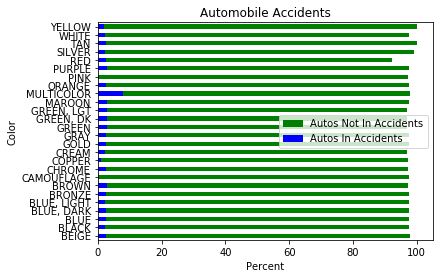

In [17]:
plt3 = autos_not_in_accidents.plot.barh(label ='Autos Not In Accidents', color='green')
plt3 = autos_in_accidents.plot.barh(label ='Autos In Accidents', color='blue')

plt3.set_xlabel('Percent')
plt3.set_ylabel('Color')
plt3.set_title('Automobile Accidents')
plt3.legend(loc='best')
#Visualizing the difference between Autos involved in accidents vs. those not.

Text(0.5, 1.0, 'Automobiles in Accidents')

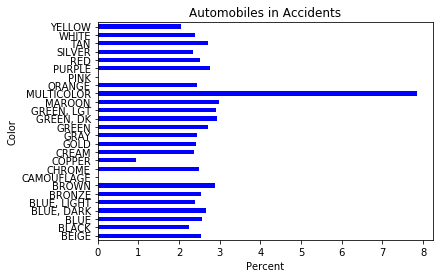

In [18]:
plt1 = autos_in_accidents.plot.barh(color='blue')
plt1.set_xlabel('Percent')
plt1.set_ylabel('Color')
plt1.set_title('Automobiles in Accidents')
#visualizing more accurately the percentage of Automobiles in Accidents.  

Text(0.5, 1.0, 'Automobiles Not in Accidents')

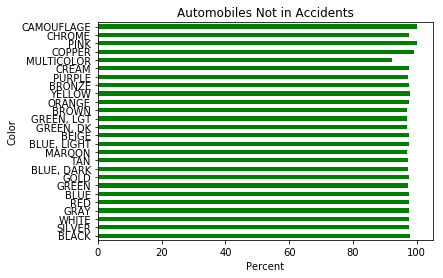

In [19]:
plt2 = autos_not_in_accidents.plot.barh(color='green')
plt2.set_xlabel('Percent')
plt2.set_ylabel('Color')
plt2.set_title('Automobiles Not in Accidents')
#visualizing more accurately the percentage of Automobiles Not in Accidents.  

Question:  **Breakdown the data by the dates of the stop.**
This is where we begin to see if not only color can help predict an automobiles chance of being in an accident.  Are certain months more prone to have accidents?  Further looking to see if certain years had more accidents?  Can a cause for this spike be identified and is it possible it will occur again?  On the reverse, if certain year had less accidents, can this cause be identified so that perhaps we can reduce accidents annually?

In [20]:
data.groupby(by=data['Date Of Stop'].dt.date).count()
#Group data by day of the stop

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop,,,,,,,,,,,,,,,,,,,,,
2012-01-01,181,181,181,181,181,181,181,181,181,181,...,181,180,181,181,181,181,181,181,181,181
2012-01-02,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,329,334,334
2012-01-03,330,330,330,330,330,330,330,330,330,330,...,330,329,330,330,330,330,330,326,330,330
2012-01-04,364,364,364,364,364,364,364,364,364,364,...,364,361,364,364,364,364,364,362,364,364
2012-01-05,465,465,465,465,465,464,465,465,465,465,...,465,463,465,465,465,465,465,461,465,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-12,302,302,302,302,302,302,302,302,302,302,...,302,290,302,302,302,302,302,302,302,302
2020-01-13,373,373,373,373,373,373,373,373,373,373,...,373,355,373,373,373,373,373,373,373,373
2020-01-14,469,469,469,469,469,469,469,469,469,469,...,469,449,469,469,469,469,469,469,469,469


In [21]:
auto_accidents_by_date = data[(data['VehicleType'] == '02 - Automobile')& (data['Accident'] == 'Yes')].groupby(by=data['Date Of Stop']).size()
#Identify sum of stops for each day.

In [22]:
data['year'] = data['Date Of Stop'].dt.year
#Creating new column, year for stops
data['month'] = data['Date Of Stop'].dt.month
#Creating new column, month for stops

In [23]:
data[data['year']== 2012]['month'].value_counts()
#View the filter frame based on year if desired

5     17397
11    13593
4     13174
10    13162
6     13075
12    12876
8     12116
9     12069
7     11694
3     11624
2     10342
1     10253
Name: month, dtype: int64

**Now looking at periods of the year that may have more frequent accidents overall.  To begin with, I created visuals to look at years as a whole, then by month. **

In [24]:
df_accident = data[(data['Accident'] == 'Yes')]

In [25]:
#dataframe showing all 7 years with monthly sums.
###HOW TO MAKE THIS ONLY ACCIDENT STOPS, (data['Accident'] == 'Yes')

pd.set_option('display.max_rows',100)
year_month_count = df_accident['Date Of Stop'].groupby([df_accident['Date Of Stop'].rename('Year').dt.year, df_accident['Date Of Stop'].rename('Month').dt.month]).agg({'count'})
year_month_count

count
Year Month       
2012 1        246
     2        205
     3        224
     4        223
     5        430
     6        317
     7        259
     8        325
     9        367
     10       309
     11       332
     12       406
2013 1        365
     2        284
     3        317
     4        404
     5        497
     6        415
     7        387
     8        385
     9        345
     10       443
     11       441
     12       341
2014 1        325
     2        324
     3        348
     4        327
     5        492
     6        426
     7        386
     8        406
     9        358
     10       460
     11       393
     12       486
2015 1        415
     2        409
     3        297
     4        335
     5        528
     6        472
     7        363
     8        349
     9        368
     10       542
     11       432
     12       529
2016 1        376
     2        348
     3        494
     4        464
     5        505
     6        441
     7        435
     8        455
     9        573
     10       580
     11       400
     12       621
2017 1        523
     2        437
     3        448
     4        510
     5        529
     6        428
     7        454
     8        449
     9        457
     10       533
     11       477
     12       536
2018 1        458
     2        354
     3        314
     4        382
     5        407
     6        483
     7        431
     8        386
     9        393
     10       502
     11       445
     12       472
2019 1        353
     2        398
     3        439
     4        325
     5        353
     6        462
     7        454
     8        367
     9        431
     10       436
     11       386
     12       448
2020 1        203

In [26]:
year_month_count.columns

Index(['count'], dtype='object')

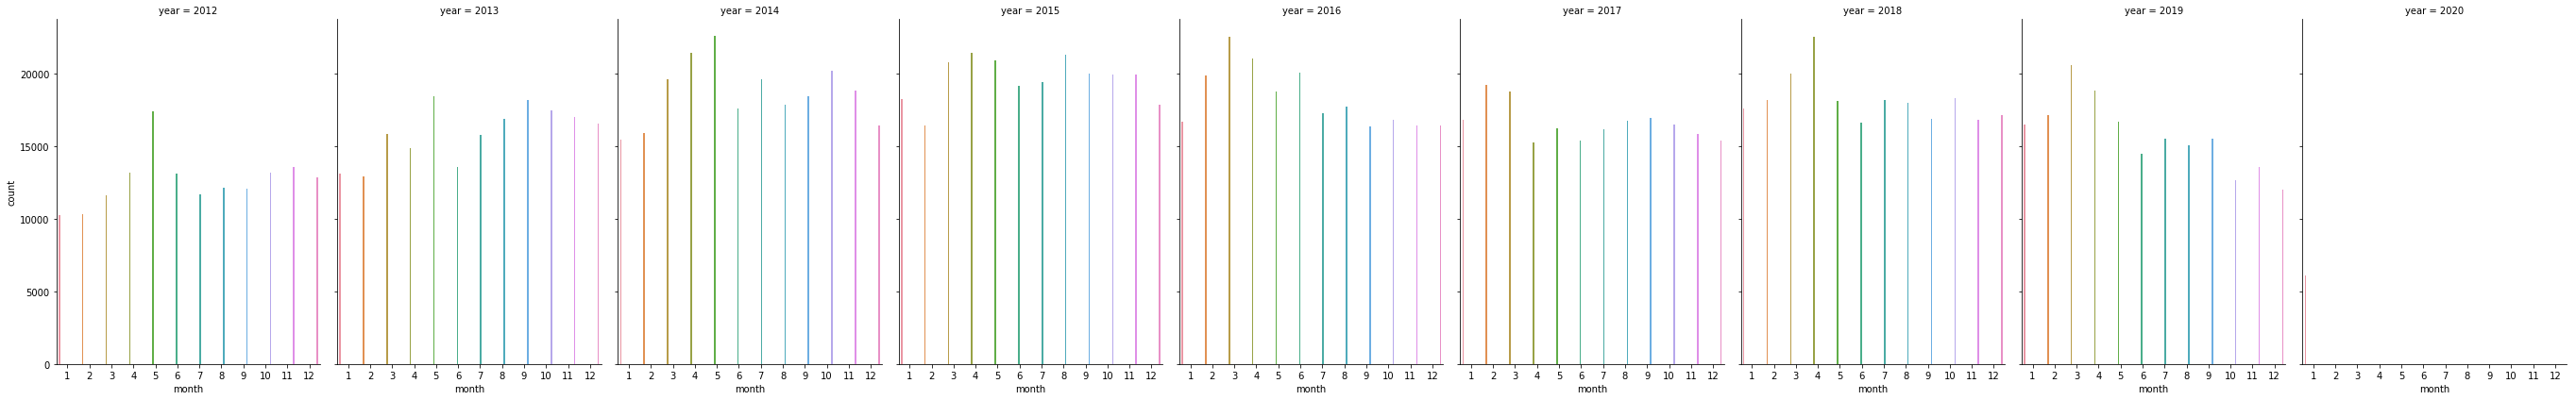

In [27]:
g = sns.catplot(x="month",hue = 'month',
              col="year",
             data=data, kind="count",
           height=6, aspect=.7);
#View all years and month sums in one visual.

* https://seaborn.pydata.org/generated/seaborn.countplot.html
    https://seaborn.pydata.org/generated/seaborn.barplot.html

**##Curiousity at particular months in each year that appear to have the highest numbers. What happened during this time to cause this?  Number of cars on the road, gas prices, weather. **

In [28]:
monthly_sum = auto_accidents_by_date.resample('M').sum()
yearly_sum = auto_accidents_by_date.resample('Y').sum()
#Create a sum variable to use for line graph

In [29]:
yearly_sum

Date Of Stop
2012-12-31    3144
2013-12-31    3893
2014-12-31    4024
2015-12-31    4452
2016-12-31    5023
2017-12-31    5264
2018-12-31    4508
2019-12-31    4460
2020-12-31     179
Freq: A-DEC, dtype: int64

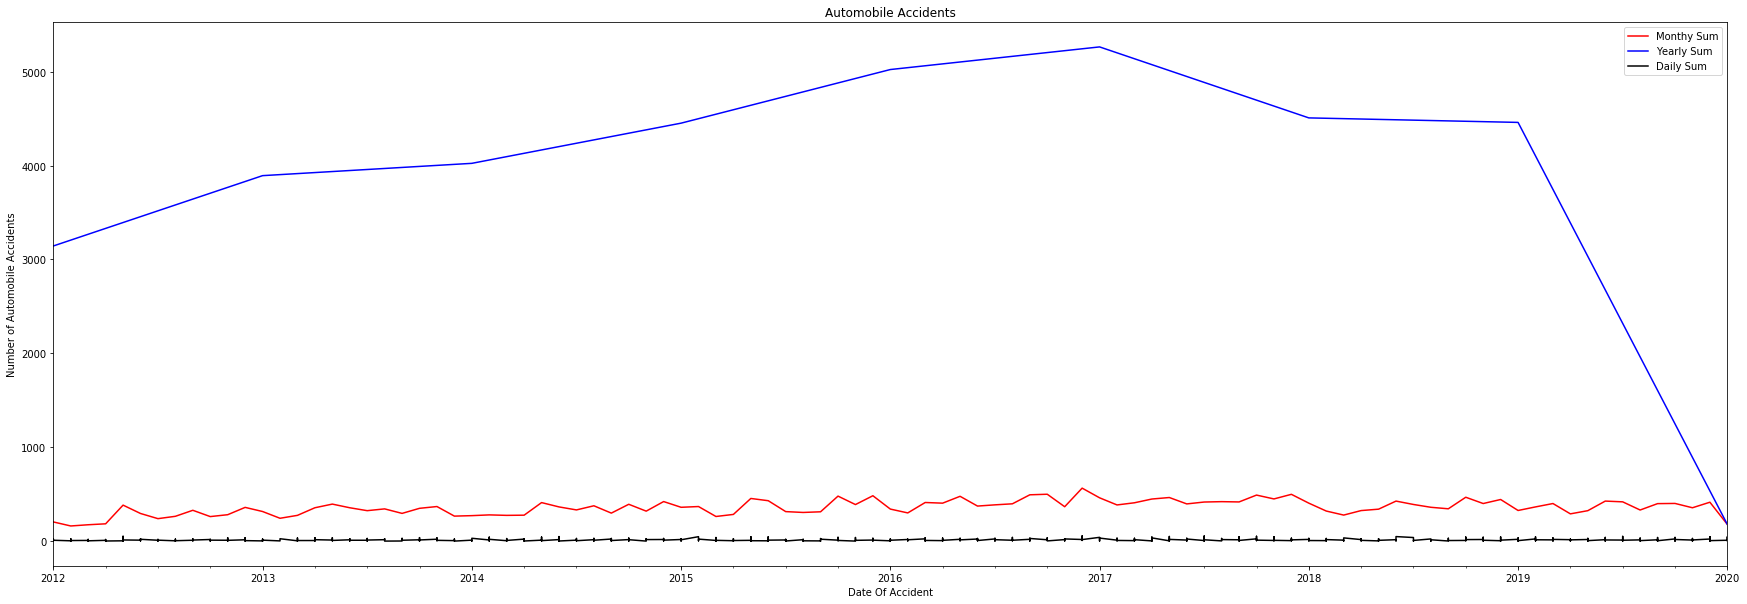

In [30]:
plt4 = monthly_sum.plot(figsize=(30,10), label = 'Monthy Sum', color = 'red')
plt4.set_xlabel('Date Of Accident')
plt4.set_ylabel('Number of Automobile Accidents')
plt4.set_title('Automobile Accidents')

plt4 = yearly_sum.plot(figsize=(30,10), label = 'Yearly Sum', color = 'blue')
plt4.set_xlabel('Date Of Accident')
plt4.set_ylabel('Number of Automobile Accidents')
plt4.set_title('Automobile Accidents')

plt4 = auto_accidents_by_date.plot(figsize=(30,10), label = 'Daily Sum',  color = 'black')
plt4.set_xlabel('Date Of Accident')
plt4.set_ylabel('Number of Automobile Accidents')
plt4.set_title('Automobile Accidents')
plt4.legend(loc='best')
#Line graphs to see a visual for any spikes or drops.

**##Interesting that the yearly sum appears to spike in 2017.  Curiousity as to what may have caused this.  Need to investigate the weather patterns potentially affecting it.**

In [31]:
year_month_count.unstack(level=0)
#Easy viewing comparison on total accidents each year.  Consider reuploading the csv file with dates through current, but only want to include through 2019, December.

count                                                        
Year    2012   2013   2014   2015   2016   2017   2018   2019   2020
Month                                                               
1      246.0  365.0  325.0  415.0  376.0  523.0  458.0  353.0  203.0
2      205.0  284.0  324.0  409.0  348.0  437.0  354.0  398.0    NaN
3      224.0  317.0  348.0  297.0  494.0  448.0  314.0  439.0    NaN
4      223.0  404.0  327.0  335.0  464.0  510.0  382.0  325.0    NaN
5      430.0  497.0  492.0  528.0  505.0  529.0  407.0  353.0    NaN
6      317.0  415.0  426.0  472.0  441.0  428.0  483.0  462.0    NaN
7      259.0  387.0  386.0  363.0  435.0  454.0  431.0  454.0    NaN
8      325.0  385.0  406.0  349.0  455.0  449.0  386.0  367.0    NaN
9      367.0  345.0  358.0  368.0  573.0  457.0  393.0  431.0    NaN
10     309.0  443.0  460.0  542.0  580.0  533.0  502.0  436.0    NaN
11     332.0  441.0  393.0  432.0  400.0  477.0  445.0  386.0    NaN
12     406.0  341.0  486.0  529.0  621.0  536.0  472.0  448.0    NaN

Answer:  There is a spike in 2017 and a low in 2012.  Several months in 2012 are low compared to all months.  September, October, and December of 2016 are significantly higher than most months recorded.  Time to consider what causes this. Are there less vehicles on the road due to weather, the economy, politics, etc.?  Now to identify if these are event that could occcur again and be predicted, leading to potentially reducing annual and monthly accidents.  


> Question:  What was the distribution for the number of automobile stops that were considered accidents each day over the entire span?

In [32]:

auto_accidents_by_date.describe()

count    2908.000000
mean       12.017538
std         8.065481
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        56.000000
dtype: float64

Answer:  Above shows the maximum number of accidents in one day through the years was 56.  The minimum being 1.  The average, mean, per day over all years was about 12 accidents.

Question:  What was the distribution for the number of automobile stops that were considered accidents each month over the entire span?

In [33]:
year_month_count.describe()

,count
count,97.000000
mean,408.164948
std,83.727320
min,203.000000
25%,353.000000
50%,409.000000
75%,458.000000
max,621.000000


Answer:  Above shows the maximum number of accidents in one year through the years 22,601.  The minimum being 7,372.  The average, mean, per year over all years was about 16,932 accidents.

**Find Correlations**
Investigating relationships between the variables to understand how and if there are influencers.  There are interesting distributions related to the Automobile accidents.  This section is where the testing happened two of the hypotheses that were in mind during this study.  

**Null Hypothesis:**
There is no statistical significance in the likelihood of an Automobile getting into an accident related to color.

**Alternative Hypothesis:**
Certain colors of Automobiles show a higher likelihood for getting in an accident.

In [34]:
contingency_table = pd.crosstab(data['Color'], data['Accident'])
print('contingency_table :-\n', contingency_table)

contingency_table :-
 Accident         No   Yes
Color                    
BEIGE         17403   462
BLACK        327580  7426
BLUE         116152  3097
BLUE, DARK    33520   908
BLUE, LIGHT   20188   520
BRONZE         3622    85
BROWN          7122   202
CAMOUFLAGE       34     0
CHROME           40     1
COPPER          494     4
CREAM           926    25
GOLD          48152  1222
GRAY         181708  4450
GREEN         55218  1555
GREEN, DK     16080   501
GREEN, LGT     8562   235
MAROON        26723   776
MULTICOLOR     1130    99
ORANGE         5567   134
PINK            223     0
PURPLE         2954    87
RED          123191  3240
SILVER       291298  6982
TAN           31027   865
WHITE        249892  6178
YELLOW         5743   278


In [35]:
Observed_Values = contingency_table.values
print("Observed Values :-\n",Observed_Values)


Observed Values :-
 [[ 17403    462]
 [327580   7426]
 [116152   3097]
 [ 33520    908]
 [ 20188    520]
 [  3622     85]
 [  7122    202]
 [    34      0]
 [    40      1]
 [   494      4]
 [   926     25]
 [ 48152   1222]
 [181708   4450]
 [ 55218   1555]
 [ 16080    501]
 [  8562    235]
 [ 26723    776]
 [  1130     99]
 [  5567    134]
 [   223      0]
 [  2954     87]
 [123191   3240]
 [291298   6982]
 [ 31027    865]
 [249892   6178]
 [  5743    278]]


In [36]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[1.74296109e+04 4.35389090e+02]
 [3.26841547e+05 8.16445326e+03]
 [1.16342775e+05 2.90622522e+03]
 [3.35889529e+04 8.39047052e+02]
 [2.02033240e+04 5.04676030e+02]
 [3.61665646e+03 9.03435408e+01]
 [7.14550631e+03 1.78493686e+02]
 [3.31713838e+01 8.28616236e-01]
 [4.00007863e+01 9.99213697e-01]
 [4.85863209e+02 1.21367908e+01]
 [9.27823116e+02 2.31768835e+01]
 [4.81707030e+04 1.20329700e+03]
 [1.81621131e+05 4.53686886e+03]
 [5.53893815e+04 1.38361852e+03]
 [1.61769034e+04 4.04096642e+02]
 [8.58260773e+03 2.14392266e+02]
 [2.68288201e+04 6.70179938e+02]
 [1.19904796e+03 2.99520398e+01]
 [5.56206055e+03 1.38939446e+02]
 [2.17565252e+02 5.43474767e+00]
 [2.96688759e+03 7.41124110e+01]
 [1.23349742e+05 3.08125822e+03]
 [2.91010599e+05 7.26940150e+03]
 [3.11147580e+04 7.77242030e+02]
 [2.49829301e+05 6.24069881e+03]
 [5.87426181e+03 1.46738187e+02]]


In [37]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [38]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 488.4484795288744


In [39]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [40]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

p-value: 0.0


In [41]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 488.4484795288744
critical_value: 3.841458820694124
p-value: 0.0


In [42]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Based on the testing, the Null Hypothesis is rejected. Therefore taking the Alternative Hypothesis certain colors of Automobiles show a higher likelihood for getting in an accident.


**Null Hypothesis:  **
There is no statistical significance in the likelihood of an Automobile getting into an accident related to the month.

**Alternative Hypothesis:**
Certain months of the year show a greater or reduced likelihood for an Automobile to get into an accident. 

In [43]:
hyp_test = year_month_count.reset_index()

In [44]:
hyp_test[['Month', 'count']].describe()
ttest,pval = stats.ttest_rel(hyp_test['Month'], hyp_test['count'])

#df[['bp_before','bp_after']].describe()
#ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.672627141580349e-69
reject null hypothesis


The test shows to reject the null hypothesis.  Therefore certain months of the year do show a greater or reduced likelihood for an Automobile to get in an accident.  

**Machine Learning Class Imbalance**

**Below are studies to look at classification techniques common in Machine Learning.  It is interesting to look at what a decision tree will show, in addition to a binary linear regression and heat map.  **

In [45]:
categorical_values_accident= data.loc[(data['VehicleType'] == '02 - Automobile') & (data['Accident'] == 'Yes'), ['Color','Race','Gender','Accident','Alcohol','Belts','Personal Injury','Property Damage','Fatal','Commercial License','HAZMAT','Commercial Vehicle','Work Zone']]
categorical_values_no_accident= data.loc[(data['VehicleType'] == '02 - Automobile') & (data['Accident'] == 'No'), ['Color','Race','Gender','Accident','Alcohol','Belts','Personal Injury','Property Damage','Fatal','Commercial License','HAZMAT','Commercial Vehicle','Work Zone']]

In [46]:
categorical_values_accident = categorical_values_accident.dropna()
categorical_values_no_accident = categorical_values_no_accident.dropna()
length_accident=len(categorical_values_accident)
length_no_accident=len(categorical_values_no_accident)
random_index= np.random.randint(0, length_no_accident, size=(1,length_accident))
# random_index[0]
categorical_values_no_accident = categorical_values_no_accident.iloc[random_index[0]]
categorical_values = pd.concat([categorical_values_no_accident, categorical_values_accident])
categorical_values['Accident'].value_counts()

Yes    34796
No     34796
Name: Accident, dtype: int64

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [47]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [48]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python


#your old value(string) and value is your new value(integer).
Accident = {'Yes': 1, 'No': 0}
#Assign these different key-value pair from above dictiionary to your table
categorical_values.Accident = [Accident[item] for item in categorical_values.Accident]


##https://www.tutorialspoint.com/replacing-strings-with-numbers-in-python-for-data-analysis

In [49]:
categorical_values = categorical_values.dropna()
categorical_values.count()
categorical_values#split dataset in features and target variable
categorical_values['Accident'].value_counts()

1    34796
0    34796
Name: Accident, dtype: int64

In [50]:
#https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# Import label encoder
from sklearn import preprocessing

In [51]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# categorical_values['Color'].unique()
# categorical_values['Color'].isnull().sum()
# Encode labels in column 
categorical_values['Color']= label_encoder.fit_transform(categorical_values['Color']) 
categorical_values['Race']= label_encoder.fit_transform(categorical_values['Race']) 
categorical_values['Gender']= label_encoder.fit_transform(categorical_values['Gender'])
categorical_values['Alcohol']= label_encoder.fit_transform(categorical_values['Alcohol'])
categorical_values['Belts']= label_encoder.fit_transform(categorical_values['Belts'])
categorical_values['Personal Injury']= label_encoder.fit_transform(categorical_values['Personal Injury']) 
categorical_values['Property Damage']= label_encoder.fit_transform(categorical_values['Property Damage']) 
categorical_values['Fatal']= label_encoder.fit_transform(categorical_values['Fatal']) 
categorical_values['Commercial License']= label_encoder.fit_transform(categorical_values['Commercial License']) 
categorical_values['HAZMAT']= label_encoder.fit_transform(categorical_values['HAZMAT']) 
categorical_values['Commercial Vehicle']= label_encoder.fit_transform(categorical_values['Commercial Vehicle']) 
categorical_values['Work Zone']= label_encoder.fit_transform(categorical_values['Work Zone'])

In [52]:
#split dataset in features and target variable
feature_cols = ['Color','Race','Gender','Alcohol','Belts','Personal Injury','Property Damage','Fatal','Commercial License','HAZMAT','Commercial Vehicle','Work Zone']
X = categorical_values[feature_cols]
y = categorical_values.Accident

In [53]:
from sklearn import datasets
from sklearn import svm
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#Dataset is broken into two parts in a ratio of 75:25. 
#75% data will be used for model training and 25% for model testing.

In [54]:
X_train.size

626328

In [55]:
X_test.size

208776

In [56]:
y_train.size

52194

In [57]:
y_test.size

17398

In [58]:
# import the class
from sklearn.linear_model import LogisticRegression

In [59]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

In [60]:
# fit the model with data
logreg.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred=logreg.predict(X_test)

In [62]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8436,  130],
       [3815, 5017]])

In [63]:
classification_accuracy = metrics.accuracy_score(y_test, y_pred)
classification_accuracy

0.7732497988274515

In [64]:
import seaborn as sns

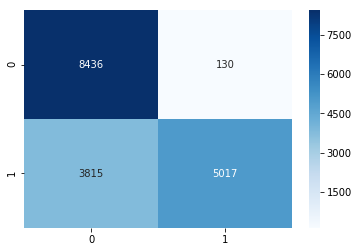

In [65]:
sns.heatmap(cnf_matrix, annot = True, fmt = 'g', cmap = 'Blues')
#Visualize the confusion matrix using a heatmap

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

Accuracy: 0.7732497988274515
Precision: 0.974742568486497
Recall: 0.5680480072463768


**Visualize the confusion matrix using a heatmap**
The classification rate is around 77%, which is a good accuracy.
The precision, or how often the model is correct, predicts that automobiles will or will not get in accidents 95.9% of the time.
If there are automobiles that will or will not get in accidents, this Logistic Regression model can identify it 57.7% of the time.

In [67]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#from matplotlib import pyplot

In [68]:
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

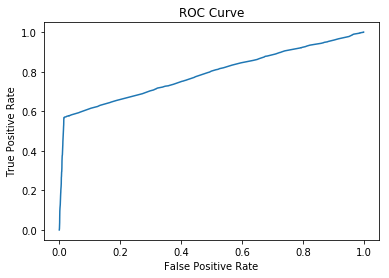

In [69]:
#predict using the predict_proba function
#pass the labels and predict_proba into the roc_curve function
#plot ROC curve
_ = plt.plot(lr_fpr, lr_tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')


**ROC Curve**
This model is doing better than a random model.
Other models may find potentially a better ROC curve.

In [70]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8356,  210],
       [3726, 5106]])

In [71]:
classification_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Classification Accuracy:",metrics.accuracy_score(y_test, y_pred))

Classification Accuracy: 0.7737670996666284


In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from graphviz import Source
from sklearn import tree

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


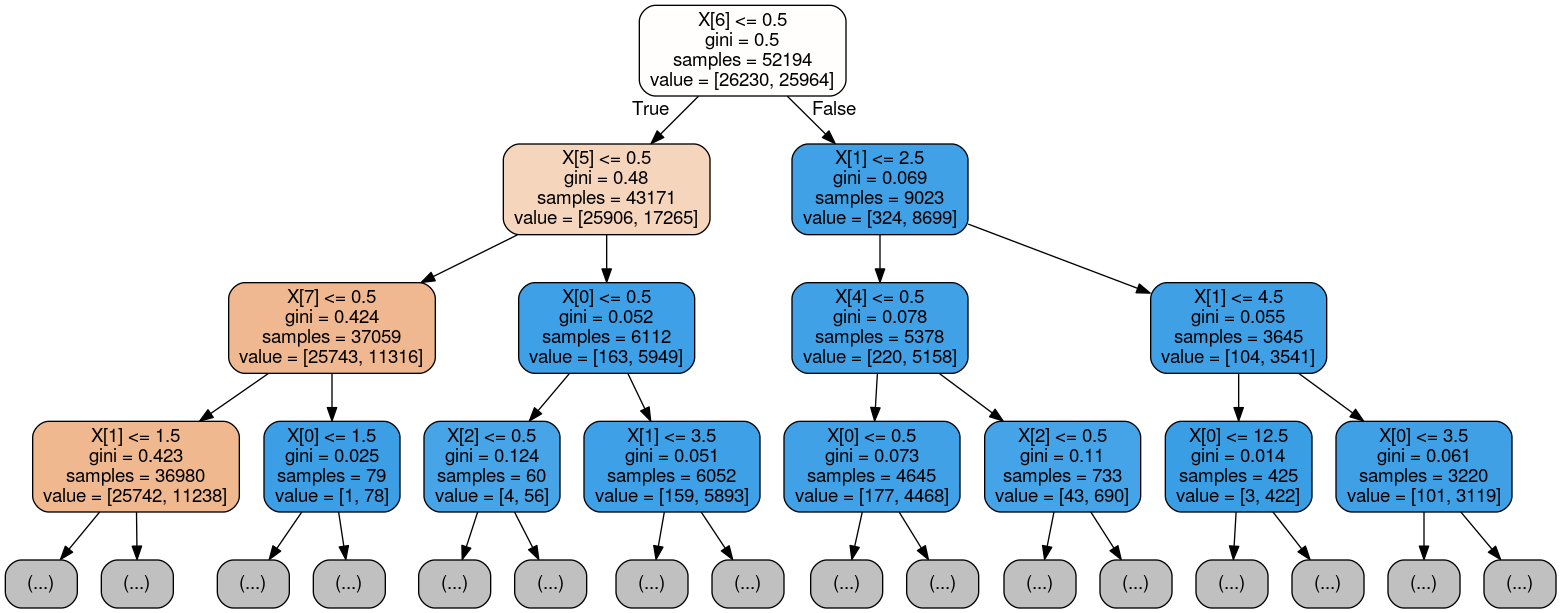

In [73]:

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    filled=True, rounded=True, special_characters=False,
                                    max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)


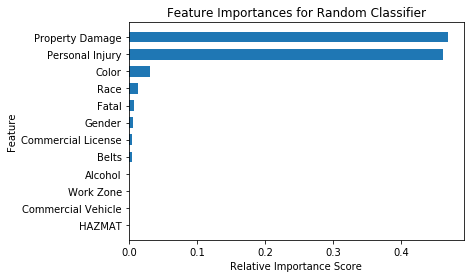

In [74]:
wqp_dt_feature_importances = clf.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(X.columns, wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')


**The top three features that predict accidents are Property Damage, Personal Injury, and the color of the automobile.**

Question:  Would grouping the colors of 'CREAM', 'MULTICOLOR', 'COPPER', 'PINK', 'CHROME', 'CAMOUFLAGE', 
into the category of 'Other' impact the viewers interpretation?  This was done due to those being more outliers and having low numbers.  

In [75]:
final_color_no_accident_other = final_color_no_accident_no_null.copy()
final_color_no_accident_other['Color'] = final_color_no_accident_other['Color'].replace(['CREAM', 'MULTICOLOR', 'COPPER', 'PINK', 'CHROME', 'CAMOUFLAGE'],'OTHER')
final_color_no_accident_other.Color.value_counts()
#Create new dataframe grouping very low numbered colors as one group called 'Other'
#This was done to consider if it has any impact on displaying information more advantageously.
#It does not do much in my opinion.  

BLACK          296132
SILVER         270899
WHITE          200018
GRAY           166136
RED            109366
BLUE           104305
GREEN           49302
GOLD            44366
BLUE, DARK      29579
TAN             28704
MAROON          22952
BLUE, LIGHT     18330
BEIGE           16315
GREEN, DK       13947
GREEN, LGT       7604
BROWN            6066
ORANGE           4913
YELLOW           4147
BRONZE           3098
PURPLE           2609
OTHER            1977
Name: Color, dtype: int64

In [76]:
final_color_accident_other = final_color_accident_no_null.copy()
final_color_accident_other['Color'] = final_color_accident_other['Color'].replace(['CREAM', 'MULTICOLOR', 'COPPER', 'PINK', 'CHROME', 'CAMOUFLAGE'],'OTHER')
final_color_accident_other.Color.value_counts()
#Using the category of 'Other' for lower numbered color samples as a group
#Looking to see how that impacts the numbers

BLACK          6788
SILVER         6475
WHITE          4903
GRAY           4161
RED            2824
BLUE           2732
GREEN          1379
GOLD           1095
BLUE, DARK      805
TAN             799
MAROON          706
BLUE, LIGHT     448
BEIGE           423
GREEN, DK       421
GREEN, LGT      227
BROWN           180
ORANGE          123
YELLOW           87
BRONZE           81
PURPLE           74
OTHER            65
Name: Color, dtype: int64

Answer:  Grouping the outliers into a category of 'Other' did not impact the viewers interpretation of how much greater the numbers in the popular colors are.  

>Question: **Does alcohol appear to have any significance in traffic stops for automobiles in accidents?  **

In [77]:
autos_in_accidents_alcohol = data.loc[(data['VehicleType'] == '02 - Automobile') & (data['Accident'] == 'Yes') & (data['Alcohol'] == 'Yes'), ['Color', 'VehicleType', 'Accident', 'Alcohol']]
##final set of colors, automobiles, that were in an accident
autos_in_accidents_alcohol_no_null = autos_in_accidents_alcohol.dropna(axis = 0, subset = ['Color'])
##drop any rows with a nan value for color
autos_in_accidents_alcohol = autos_in_accidents_alcohol_no_null 
autos_in_accidents_alcohol.Color.value_counts()
#Count the final set of colors for Automobiles in Accidents, that involved alcohol.

BLACK          47
BLUE           16
GRAY           16
TAN            14
MAROON         13
WHITE           7
GOLD            1
BLUE, LIGHT     1
Name: Color, dtype: int64

In [78]:
final_color_accident_no_null.Color.value_counts()
#Revisitng the count the final set of colors for Automobiles in Accidents.

BLACK          6788
SILVER         6475
WHITE          4903
GRAY           4161
RED            2824
BLUE           2732
GREEN          1379
GOLD           1095
BLUE, DARK      805
TAN             799
MAROON          706
BLUE, LIGHT     448
BEIGE           423
GREEN, DK       421
GREEN, LGT      227
BROWN           180
ORANGE          123
YELLOW           87
BRONZE           81
PURPLE           74
MULTICOLOR       40
CREAM            20
COPPER            4
CHROME            1
Name: Color, dtype: int64

In [79]:
(autos_in_accidents_alcohol['Color'].value_counts()/final_color_accident_no_null['Color'].count())*100

#Auto in accident with alcohol / Autos in accidents

BLACK          0.135073
BLUE           0.045982
GRAY           0.045982
TAN            0.040235
MAROON         0.037361
WHITE          0.020117
GOLD           0.002874
BLUE, LIGHT    0.002874
Name: Color, dtype: float64

Answer:  **The percentage of vehicles in accidents that involved alcohol vs. vehicles in accidents in each color.  This is a small percentage.  For example, 47 out of 6,788 black automobiles in accidents involved alcohol.  There was a total of 302,920 black automobiles overall. 


Conclusion:
Certain colors of vehicles have a slightly higher risk for being in an accident when looking at the percentages related to each individual color.  The risks overall vary by <1%, and therefore it doesn't seem a strong statement to make for clients to base decisions from.  
Certain months of the years showed a variance in accidents that could vary by more than 200 compared to other months in the same year.  This merits further investigation by a client or company who wishes to use this information.  The weather may have played a factor or perhaps the economy.  

